### Orr-Sommerfeld eqs - cylinder flow 

    data = https://www.ece.umn.edu/users/mihailo/software/dmdsp/download.html

In [9]:
%run DMD_functions.ipynb
%run Hemati_DMD_functions.ipynb

import pydmd

In [10]:
from scipy.io import loadmat

podaci = loadmat('channel.mat')

# Display the variable names in the .mat file
print(podaci.keys())

dt = np.array(podaci['dT'][0,0])
os = podaci['Eos']
s=podaci['S']
v=podaci['V']
ux = podaci['UstarX1']

podaci2 = loadmat('x0.mat')
x0=podaci2['x0']

del (podaci, podaci2)

xfull = loadmat('channel_xfull.mat')
xfull = xfull['X']
xfull.shape

dict_keys(['__header__', '__version__', '__globals__', 'dT', 'Eos', 'S', 'V', 'UstarX1'])


(150, 101)

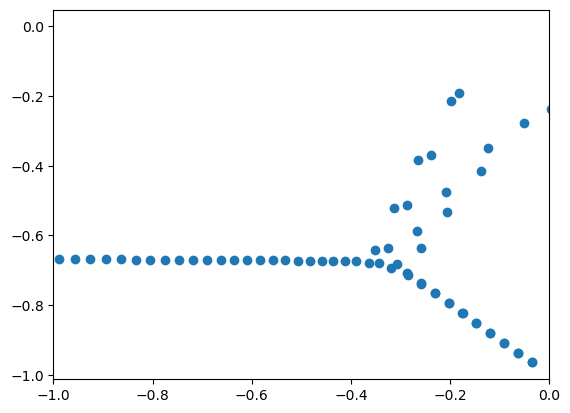

In [11]:
import matplotlib.pyplot as plt


plt.scatter(np.real(os), np.imag(os))
plt.xlim((-1,0))
plt.show()

c:\Users\dimotela\anaconda3\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 5.012705967360296e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
c:\Users\dimotela\anaconda3\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 5.2265511995025715e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


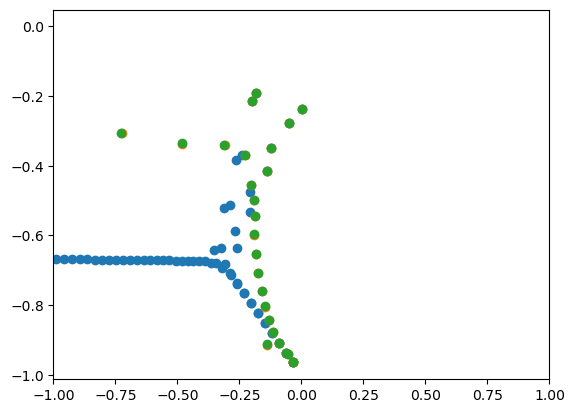

In [17]:
Z, L, r, _, _ = GEDMDQ(xfull, k=26)

dmd1 = pydmd.DMD(svd_rank=26)
dmd1.fit(xfull[:,:100], xfull[:,1:101])
dmd1.dmd_time['tend']=100
dmd1.reconstructed_data.shape

plt.scatter(np.real(os), np.imag(os)) #real orr-sommerfeld eigs
plt.scatter(np.real(np.log(L)), np.imag(np.log(L))) #treba log L / dt, kod nas dt=1
plt.scatter(np.real(np.log(dmd1.eigs)), np.imag(np.log(dmd1.eigs)))
plt.xlim(-1,1)
plt.show()

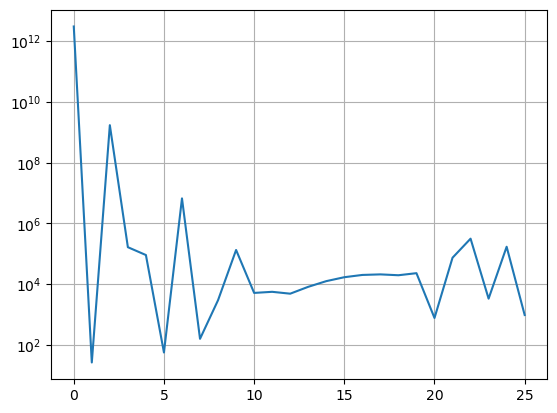

In [18]:
plt.plot(1/r)
plt.yscale('log')
plt.grid()
plt.show()

In [19]:
threshold = 1e-1
indices = np.where(r<threshold)[0]
times=[i for i in range(101)]

reconstructed = DMD_reconstruction(xfull, Z, indices, L, times)
reconstructed-xfull

##bolje za veliki threshold (npr. 1e-1 umjesto 1e-6, 1e-8)
## bolje realni dio aprox nego imaginarni.., npr za threshold = 1e-1:
#  8.47333220e-16-2.95758635e-06j,  2.49252870e-15-3.40053401e-06j, -2.72402492e-15-2.25934521e-06j,...

#dmd1.reconstructed_data - xfull
#pydmd bolje aproksimira.. zasto..

array([[ 5.33519584e-16-2.95758635e-06j,  3.06589483e-15-3.40053401e-06j,
         2.65559313e-15-2.25934521e-06j, ...,
        -2.64363218e-16-3.62451149e-06j, -2.43948220e-15-4.00302286e-06j,
        -1.08708046e-14-4.15521005e-06j],
       [ 1.60258634e-16-4.63961839e-05j,  2.77037372e-16-5.38544895e-05j,
         5.08212992e-16-3.62264443e-05j, ...,
         5.60193710e-16-5.73386267e-05j,  3.23691947e-15-6.34591404e-05j,
         6.77602556e-15-6.59929776e-05j],
       [ 8.08692848e-16-2.27242581e-04j,  8.09275607e-16-2.67927798e-04j,
        -7.31592521e-16-1.83835228e-04j, ...,
        -6.05391388e-16-2.84829025e-04j,  1.02621091e-15-3.16329931e-04j,
         5.72060642e-15-3.29962019e-04j],
       ...,
       [ 5.98479599e-17-2.20238939e-04j, -2.81784145e-16+3.21871409e-05j,
         6.51713926e-16+1.86545453e-04j, ...,
         2.10714692e-16-2.82906780e-04j, -6.67150254e-16-3.14231300e-04j,
        -2.08998603e-15-3.28344001e-04j],
       [ 1.17635936e-17-4.18965228e-05j, -5.

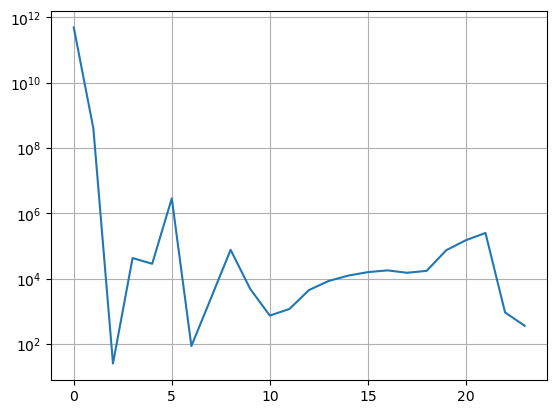

array([[ 8.75766846e-16-2.95758635e-06j,  2.43333995e-15-3.40053401e-06j,
         2.82682042e-15-2.25934521e-06j, ...,
         6.29925697e-16-3.62451149e-06j, -3.17221864e-15-4.00302286e-06j,
        -6.29789567e-15-4.15521005e-06j],
       [ 4.23021806e-16-4.63961839e-05j,  2.00401219e-15-5.38544895e-05j,
         3.15367307e-16-3.62264443e-05j, ...,
         6.02518252e-16-5.73386267e-05j,  3.42117285e-15-6.34591404e-05j,
         2.01014217e-15-6.59929776e-05j],
       [ 1.70357977e-15-2.27242581e-04j,  8.52697904e-15-2.67927798e-04j,
         8.54595257e-16-1.83835228e-04j, ...,
        -1.01833689e-15-2.84829025e-04j,  7.22136923e-15-3.16329931e-04j,
         8.29791592e-15-3.29962019e-04j],
       ...,
       [ 2.09218493e-15-2.20238939e-04j, -1.14223951e-14+3.21871409e-05j,
         1.17879881e-15+1.86545453e-04j, ...,
        -7.75529814e-16-2.82906780e-04j, -1.99531011e-14-3.14231300e-04j,
        -3.37735279e-14-3.28344001e-04j],
       [ 4.15086802e-16-4.18965228e-05j, -2.

In [26]:
Z, L, r, _, _ = GEDMDQ(xfull)

plt.plot(1/r)
plt.yscale('log')
plt.grid()
plt.show()

indices = np.where(r<1)[0] #uzimam ih sve
times=[i for i in range(101)]

reconstructed = DMD_reconstruction(xfull, Z, indices, L, times)
reconstructed-xfull

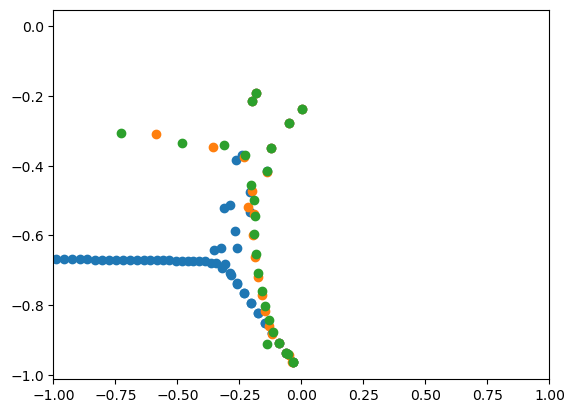

In [27]:
plt.scatter(np.real(os), np.imag(os)) #real orr-sommerfeld eigs
plt.scatter(np.real(np.log(L)), np.imag(np.log(L))) #treba log L / dt, kod nas dt=1
plt.scatter(np.real(np.log(dmd1.eigs)), np.imag(np.log(dmd1.eigs)))
plt.xlim(-1,1)
plt.show()

### DODAVANJE snapshotova i oduzimanje